In [23]:
import pandas as pd
import great_expectations as gx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## load data

In [29]:
df = pd.read_csv('data/listing_amsterdam.csv')

l_column_names = ['id',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'availability_365',
]

train_indices, test_indices = train_test_split(range(len(df)), test_size=0.2, random_state=42)
train_df = df.iloc[train_indices][l_column_names]
test_df = df.iloc[test_indices][l_column_names]
train_df.to_csv('data/train.csv',index=False)
test_df.to_csv('data/test.csv',index=False)

In [30]:
train_df = pd.read_csv('data/train.csv')
l_train_column_names = ['id',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'availability_365',
]

In [31]:
test_df = gx.read_csv('data/test.csv')
test_df.head()

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365
0,23638700,De Baarsjes - Oud-West,Private room,324,2,91,2023-06-05,226
1,19685954,De Baarsjes - Oud-West,Private room,210,6,17,2023-05-20,248
2,647783887358956441,Oud-Noord,Entire home/apt,130,6,3,2023-01-31,8
3,653459,Buitenveldert - Zuidas,Entire home/apt,240,6,18,2022-07-31,0
4,29705321,De Baarsjes - Oud-West,Private room,196,3,192,2023-06-05,52


In [39]:
test_df.isnull().sum()

room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review          143
availability_365       0
dtype: int64

In [32]:
test_df = gx.read_csv('data/test.csv')
test_df.drop(['id','neighbourhood'],axis=1,inplace=True)

In [50]:
test_df.head()

,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365
0,Private room,324,2,91,2023-06-05,226
1,Private room,210,6,17,2023-05-20,248
2,Entire home/apt,130,6,3,2023-01-31,8
3,Entire home/apt,240,6,18,2022-07-31,0
4,Private room,196,3,192,2023-06-05,52


Text(0.5, 1.0, 'test df')

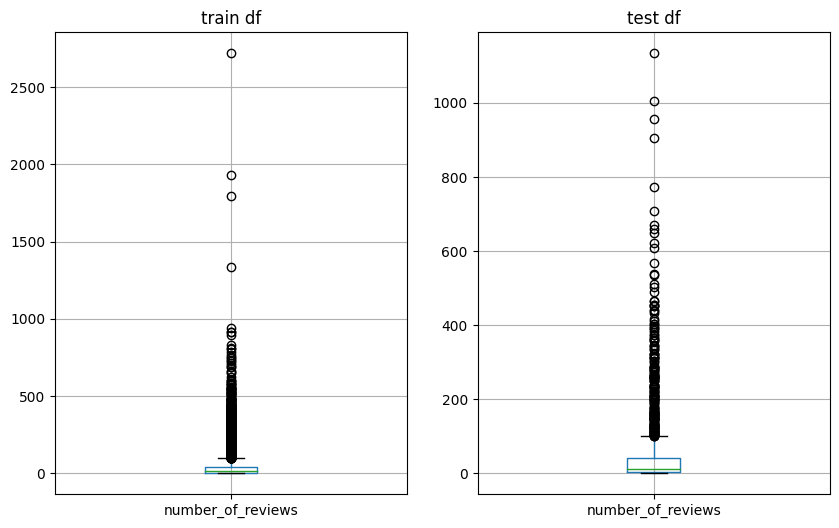

In [34]:
figure, axes = plt.subplots(1, 2,figsize=(10,6))

train_df.boxplot('number_of_reviews',ax=axes[0])
axes[0].set_title('train df')
test_df.boxplot('number_of_reviews',ax=axes[1])
axes[1].set_title('test df')

## create expectations

### 1. Check if there are the same columns as before

In [37]:
l_train_column_names = list(train_df)
test_df.expect_table_columns_to_match_set(column_set=l_train_column_names)

{
  "success": false,
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": [
      "availability_365",
      "last_review",
      "minimum_nights",
      "number_of_reviews",
      "price",
      "room_type"
    ],
    "details": {
      "mismatched": {
        "missing": [
          "id",
          "neighbourhood"
        ]
      }
    }
  }
}

### 2. Check if there are no null values in last_review

In [42]:
test_df.expect_column_values_to_not_be_null('last_review')

{
  "success": false,
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "element_count": 1522,
    "unexpected_count": 143,
    "unexpected_percent": 9.395532194480946,
    "unexpected_percent_total": 9.395532194480946,
    "partial_unexpected_list": []
  }
}

### 3. Check if the type of minimum_nights is an integer

In [44]:
test_df.expect_column_values_to_be_in_type_list('minimum_nights', ['int'])

{
  "success": true,
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": "int64"
  }
}

In [47]:
train_df.describe([x*0.1 for x in range(10)])[['price']]

,price
count,6086.000000
mean,252.011666
std,266.240119
min,0.000000
0%,0.000000
10%,100.000000
20%,132.000000
30%,155.000000
40%,180.000000
50%,204.000000


### 4. Check if the maximum price is within a specific interval

In [49]:
test_df.expect_column_max_to_be_between(column='price', min_value=413,  max_value=12000)

{
  "success": true,
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "result": {
    "observed_value": 7900,
    "element_count": 1522,
    "missing_count": null,
    "missing_percent": null
  }
}